### Assignment 01– Preprocessing
Diamonds_new Dataset is given.

Load the dataset into python environment and do the following
1. Handle the Missing values
2. Outlier Detection
3. Scaling
4. Encoding

In [1]:
#Importing neccessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
data = pd.read_csv("diamonds_new.csv")
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [3]:
data.shape

(53940, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [5]:
data.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [6]:
data.dtypes

carat        float64
cut           object
color         object
clarity       object
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

## 1. Handling missing values

In [7]:
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

- features 'carat', 'color' and 'table' has missing values 

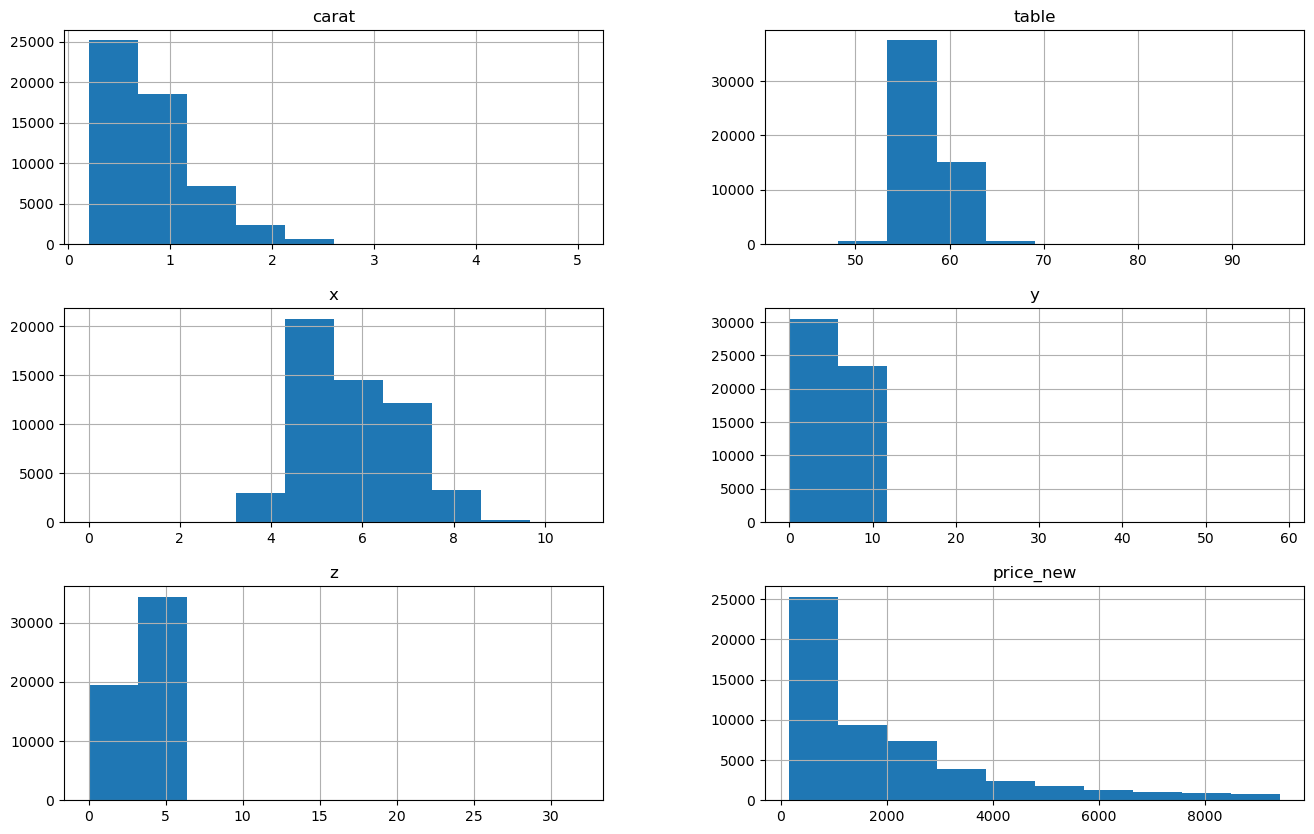

In [8]:
data.hist(figsize=(16,10))
plt.show()

- no features follows normal distribution

In [9]:
data['color'].mode()

0    G
Name: color, dtype: object

In [10]:
#filling missing values in col 'color' with mode since its categorical
data['color']=data['color'].fillna(data['color'].mode()[0])

In [11]:
#filling missing values in col 'carat' and 'table' with median since they are skewed
data['carat']=data['carat'].fillna(data['carat'].median())
data['table']=data['table'].fillna(data['table'].median())

In [12]:
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

## 2. Outlier Detection and Handling

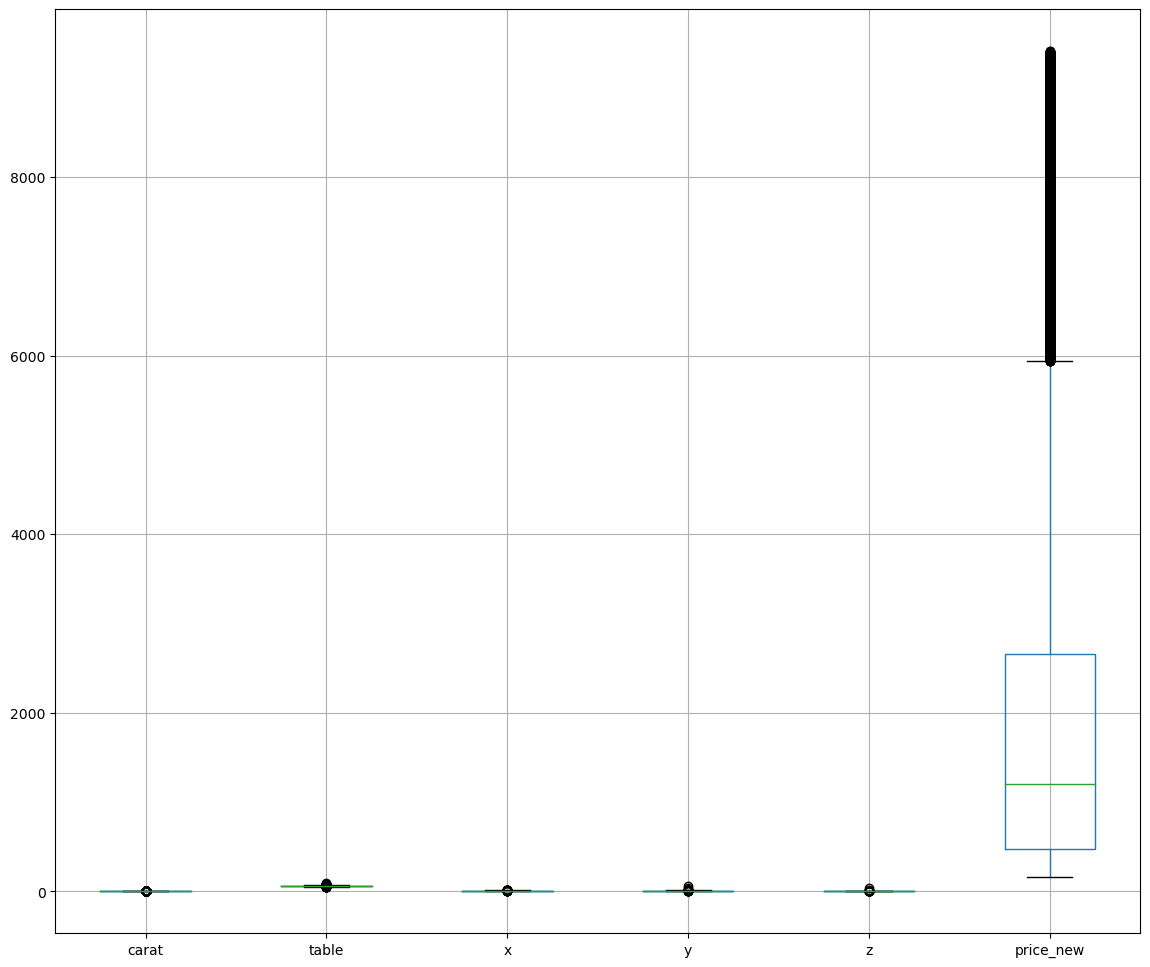

In [13]:
#Outlier Detection using boxplot
data.boxplot(figsize=(14,12))
plt.show()

- we dont have to consider 'price_new' as it is dependent feature.

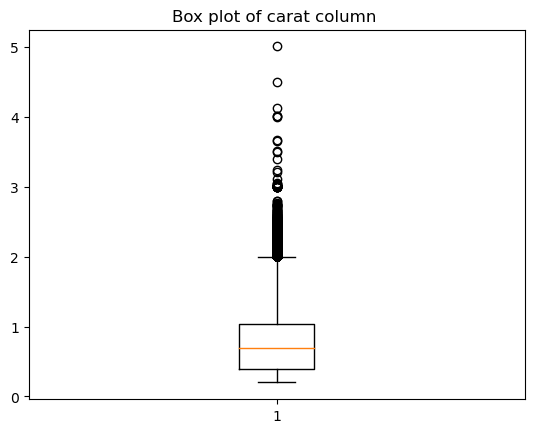

In [14]:
#outlier detection using boxplot of col 'carat'
plt.boxplot(data['carat'])                            
plt.title('Box plot of carat column ')
plt.show()

#### REMOVING OUTLIERS USING IQR Method

In [15]:
Q1=np.percentile(data['carat'],25,interpolation='midpoint')
Q2=np.percentile(data['carat'],50,interpolation='midpoint')
Q3=np.percentile(data['carat'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.4
0.7
1.04


In [16]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-0.5599999999999999
2.0


In [17]:
outlier = []
for x in data['carat']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
len(outlier)

1889

In [18]:
data[data['carat']<low_lim].index

Int64Index([], dtype='int64')

In [19]:
data[data['carat']>up_lim].index

Int64Index([12246, 13002, 13118, 13757, 13991, 13992, 14138, 14912, 14913,
            15151,
            ...
            27734, 27736, 27737, 27738, 27739, 27741, 27742, 27744, 27746,
            27749],
           dtype='int64', length=1889)

In [60]:
#We are not dropping all outliers as it is too many. Instead we are just dropping outliers above carat value as 4.

In [21]:
#outlier indexes
out_index=np.where(data['carat']>4)
print(out_index)

(array([25998, 25999, 27130, 27415, 27630], dtype=int64),)


In [22]:
data.drop([25998, 25999, 27130, 27415, 27630],inplace=True)

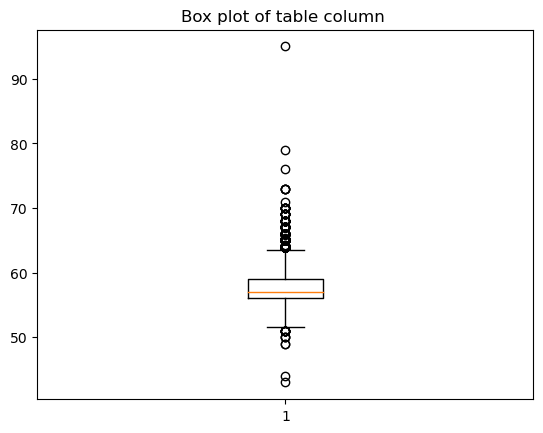

In [23]:
#outlier detection using boxplot of col 'table'
plt.boxplot(data['table'])                            
plt.title('Box plot of table column ')
plt.show()

#### REMOVING OUTLIERS USING SD Method

In [24]:
table_std = np.std(data['table'])                #outlier detection using SD
table_std

2.234372539687515

In [25]:
cut_off = table_std*3
cut_off

6.703117619062546

In [26]:
table_mean = np.mean(data['table'])
lower,upper = table_mean-cut_off,table_mean+cut_off               #mean-3SD,mean+3SD

In [27]:
outliers = [x for x in data['table'] if x<lower or x>upper]
outliers
print('Number of outliers are: ',len(outliers))

Number of outliers are:  336


In [28]:
data[data['table']<lower].index

Int64Index([3238, 5979, 7418, 11368, 22701, 25179, 35633], dtype='int64')

In [29]:
data[data['table']>upper].index

Int64Index([    2,    91,   227,   296,   314,   356,   359,   526,   712,
              771,
            ...
            52865, 53064, 53154, 53226, 53503, 53542, 53660, 53695, 53697,
            53785],
           dtype='int64', length=329)

In [30]:
data.drop([3238, 5979, 7418, 11368, 22701, 25179, 35633],inplace=True)

In [31]:
data.drop(data[data['table']>upper].index,inplace=True)

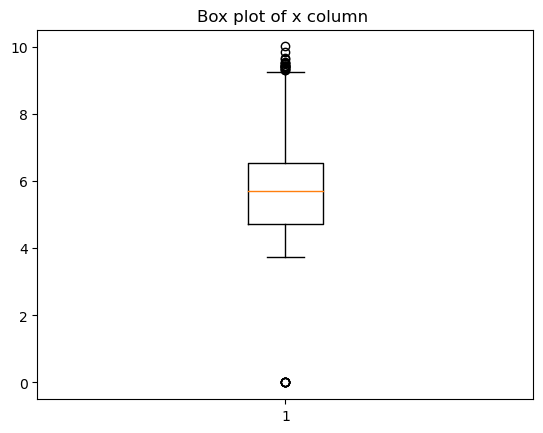

In [32]:
#outlier detection using boxplot of col 'x'
plt.boxplot(data['x'])                            
plt.title('Box plot of x column ')
plt.show()

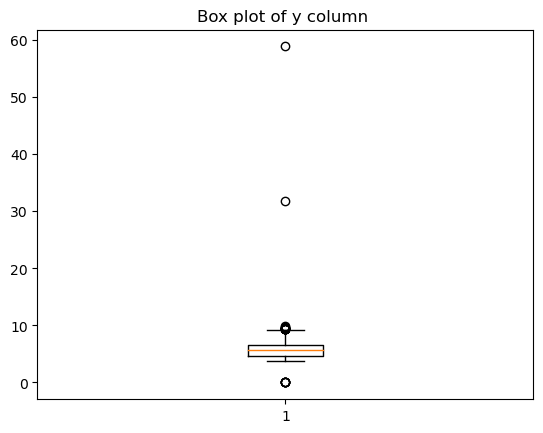

In [33]:
#outlier detection using boxplot of col 'y'
plt.boxplot(data['y'])                            
plt.title('Box plot of y column ')
plt.show()

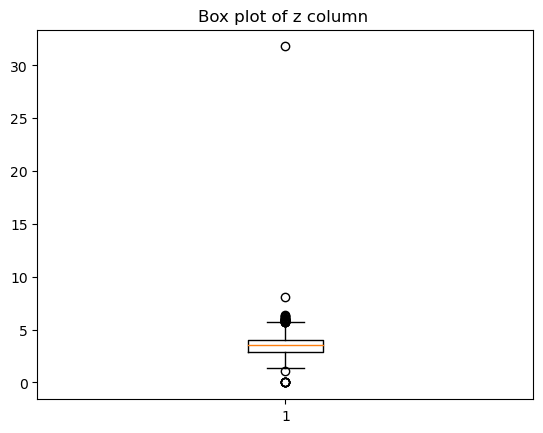

In [34]:
#outlier detection using boxplot of col 'z'
plt.boxplot(data['z'])                            
plt.title('Box plot of z column ')
plt.show()

In [35]:
# ### square root transformation
# data['carat_sqrt']  = data["carat"] ** 0.5

In [36]:
# fig, axes = plt.subplots(1,2, figsize = (12,7))
# sns.distplot(data['carat'], ax = axes[0])
# sns.distplot(data['carat_sqrt'], ax = axes[1])
# plt.show();

In [37]:
# data["carat_sqrt_1"] = np.log(data["carat"])

In [38]:
# fig, axes = plt.subplots(1,2, figsize = (12,7))
# sns.distplot(data['carat'], ax = axes[0])
# sns.distplot(data['carat_sqrt_1'], ax = axes[1])
# plt.show();

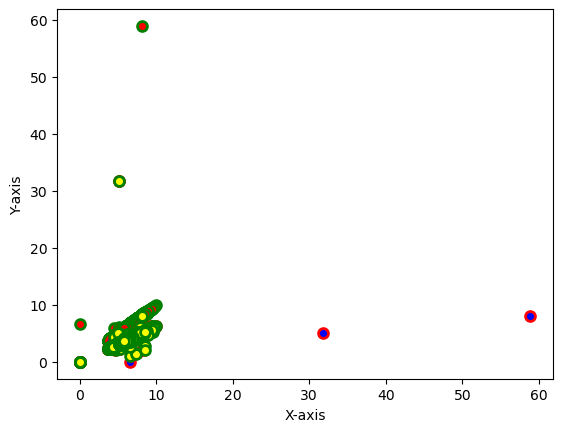

In [39]:
plt.scatter(data['x'],data['y'], c ="red",
            linewidths = 2,
            edgecolor ="green",
            s = 50)
 
plt.scatter(data['y'],data['z'], c ="blue",
            linewidths = 2,
            edgecolor ="red",
            s = 50)

plt.scatter(data['x'],data['z'], c ="yellow",
            linewidths = 2,
            edgecolor ="green",
            s = 50)
 
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

- if x , y, z values are more than 30 , then it act as kind of an outlier

In [40]:
data[data['x'] > 30].index

Int64Index([], dtype='int64')

In [41]:
data[data['y'] > 30].index

Int64Index([24067, 49189], dtype='int64')

In [42]:
data[data['z'] > 30].index

Int64Index([48410], dtype='int64')

In [43]:
data = data.drop([24067,49189,48410])

- Major outliers from features 'x', 'y', and 'z' is been removed

In [44]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
5,0.24,Very Good,J,VVS2,57.0,3.94,3.96,2.48,168.0


In [45]:
data.nunique()

carat          269
cut              5
color            7
clarity          8
table          108
x              548
y              545
z              368
price_new    11579
dtype: int64

In [46]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [47]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [48]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

## 3. Encoding

In [49]:
# using Label Encoding for ordinal features

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['cut'] = le.fit_transform(data['cut'])
data['clarity'] = le.fit_transform(data['clarity'])

In [50]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,2,E,3,55.0,3.95,3.98,2.43,163.0
1,0.21,3,E,2,61.0,3.89,3.84,2.31,163.0
3,0.29,3,I,5,58.0,4.20,4.23,2.63,167.0
4,0.31,1,J,3,58.0,4.34,4.35,2.75,167.5
5,0.24,4,J,7,57.0,3.94,3.96,2.48,168.0


In [51]:
# using one-hot encoding for feature 'color'
data=pd.get_dummies(data)

In [52]:
data.head()

,carat,cut,clarity,table,x,y,z,price_new,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,2,3,55.0,3.95,3.98,2.43,163.0,0,1,0,0,0,0,0
1,0.21,3,2,61.0,3.89,3.84,2.31,163.0,0,1,0,0,0,0,0
3,0.29,3,5,58.0,4.20,4.23,2.63,167.0,0,0,0,0,0,1,0
4,0.31,1,3,58.0,4.34,4.35,2.75,167.5,0,0,0,0,0,0,1
5,0.24,4,7,57.0,3.94,3.96,2.48,168.0,0,0,0,0,0,0,1


### Splitting into independent and dependent features

In [53]:
x=data.drop('price_new',axis=1)
y=data['price_new']

# Perform 80 : 20 Train-Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=123)
# Observe the shapes
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((40197, 14), (40197,), (13399, 14), (13399,))

## 4. Scaling

In [54]:
# using MinMax Scalar (x - min)/ (max- min)

# Import the class MinMaxScaler                                #Normalization
from sklearn.preprocessing import MinMaxScaler
# Create an instance of the class
scaler = MinMaxScaler()
# Use the fit transform method to perform the transformation on train data
x_train.loc[:,:] = scaler.fit_transform(x_train)
## Use the fit transform method to perform the transformation on train data
x_test.loc[:,:] = scaler.transform(x_test)

In [55]:
x_train

,carat,cut,clarity,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
34522,0.034211,0.75,0.857143,0.615385,0.437562,0.443662,0.431062,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24216,0.386842,0.50,0.714286,0.461538,0.755245,0.763581,0.743265,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32855,0.052632,0.25,0.714286,0.384615,0.467532,0.472837,0.472266,0.0,0.0,0.0,1.0,0.0,0.0,0.0
27593,0.473684,0.50,0.285714,0.076923,0.804196,0.814889,0.801902,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25153,0.289474,1.00,1.000000,0.538462,0.704296,0.715292,0.678288,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,0.210526,1.00,0.714286,0.615385,0.631369,0.641851,0.630745,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17857,0.297368,0.75,0.285714,0.769231,0.704296,0.706237,0.681458,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28223,0.034211,0.75,0.571429,0.538462,0.438561,0.446680,0.431062,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15842,0.307895,0.75,0.714286,0.615385,0.721279,0.721328,0.694136,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
x_train.describe()

,carat,cut,clarity,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
count,40197.000000,40197.000000,40197.000000,40197.000000,40197.000000,40197.000000,40197.000000,40197.000000,40197.000000,40197.000000,40197.00000,40197.000000,40197.000000,40197.000000
mean,0.157041,0.641385,0.547855,0.492765,0.572177,0.576445,0.560629,0.126975,0.179939,0.177750,0.20907,0.154415,0.100406,0.051447
std,0.124401,0.253988,0.246585,0.163285,0.112118,0.112039,0.109884,0.332949,0.384141,0.382307,0.40665,0.361350,0.300544,0.220910
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.052632,0.500000,0.285714,0.384615,0.470529,0.474849,0.461173,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.131579,0.500000,0.571429,0.461538,0.568432,0.574447,0.557845,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.221053,0.750000,0.714286,0.615385,0.653347,0.657948,0.640254,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [57]:
x_test

,carat,cut,clarity,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
32074,0.031579,0.50,0.714286,0.307692,0.442557,0.448692,0.432647,0.0,0.0,1.0,0.0,0.0,0.0,0.0
35053,0.028947,0.50,0.857143,0.461538,0.437562,0.441650,0.423138,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28248,0.034211,0.50,0.571429,0.307692,0.442557,0.448692,0.437401,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38191,0.055263,0.50,0.285714,0.461538,0.475524,0.472837,0.465927,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2905,0.157895,0.25,0.714286,0.869231,0.596404,0.604628,0.573693,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16486,0.286842,0.75,0.285714,0.461538,0.701299,0.701207,0.683043,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44380,0.078947,0.75,0.714286,0.692308,0.508492,0.516097,0.489699,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21499,0.350000,0.50,0.428571,0.461538,0.738262,0.736419,0.729002,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34973,0.007895,1.00,0.857143,0.307692,0.400599,0.404427,0.385103,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
y_train

34522     434.0
24216    6203.0
32855     403.5
27593    9220.0
25153    6862.5
          ...  
15493    3104.0
17857    3602.0
28223     333.0
15842    3168.5
53070    1304.5
Name: price_new, Length: 40197, dtype: float64

In [59]:
y_test

32074     390.5
35053     442.0
28248     333.0
38191     507.5
2905     1641.5
          ...  
16486    3294.0
44380     790.5
21499    4798.0
34973     236.0
31773     386.5
Name: price_new, Length: 13399, dtype: float64